# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import re
import json
import numpy as np


import requests
import pandas as pd
import tweepy
import seaborn as sns 
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth',800)

np.random.seed(42)

In [4]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
df_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code

200

In [7]:
with open("image_predictions.tsv", mode= 'wb') as file:
    file.write(response.content)

In [8]:
df_image_predictions = pd.read_csv("image_predictions.tsv" , sep='\t')

In [9]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_image_predictions.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
!pip install -U tweepy==4.0

    100% |████████████████████████████████| 61kB 4.3MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 6.5MB/s ta 0:00:011
  Found existing installation: oauthlib 2.0.6
    Uninstalling oauthlib-2.0.6:
      Successfully uninstalled oauthlib-2.0.6
  Found existing installation: requests-oauthlib 0.8.0
    Uninstalling requests-oauthlib-0.8.0:
      Successfully uninstalled requests-oauthlib-0.8.0
  Found existing installation: tweepy 3.5.0
    Uninstalling tweepy-3.5.0:
      Successfully uninstalled tweepy-3.5.0


In [11]:
import tweepy 

consumer_key = "4fTu51Ej9NbDA698zuPJ6wfvY" 
consumer_secret ="GnTjw7DDvT8HmfkZxhCAmFQLSTpRABDDcRm7Na7fNus2Y0LRhb" 
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
api

In [11]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
%%time

import json

count = 0
fails_dict = {}
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            print("Success")
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
        

print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [98]:
len(fails_dict)

NameError: name 'fails_dict' is not defined

In [12]:
json_df = pd.read_json("tweet-json.txt", lines = True, encoding='utf-8')
json_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statu..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/89217742130634342

In [13]:
json_df = json_df[['id','favorite_count','retweet_count']]

In [14]:
json_df.columns = ['tweet_id','favorite_count','retweet_count']

In [15]:
json_df.shape

(2354, 3)

In [16]:
json_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [17]:
full_df = df_archive.merge(df_image_predictions, how = 'left', on = 'tweet_id').merge(json_df, how= 'left',on= 'tweet_id')

In [18]:
full_df.shape

(2356, 30)

In [19]:
full_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [20]:
full_df.to_csv('df_full.csv', index=False)

In [21]:
full_df.to_csv('full_df.csv')
full_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11673.0,4858.0
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305783398402/photo/1,11,10,Carper,None,None,None,None,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1.0,Labrador_retriever,0.584580,True,German_short-haired_pointer,0.340657,True,Chesapeake_Bay_retriever,0.031975,True,2669.0,542.0
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228088049664/photo/1,11,10,Banjo,None,None,pupper,None,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1.0,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True,2878.0,1118.0
611,797165961484890113,7.971238e+17,29166305.0,2016-11-11 19:55:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@JODYHiGHROLLER it may be an 11/10 but what do I know 😉,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,32.0
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,20.0


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1.In the text column, there are urls, and these urls also appear in the expanded_urls section.

2.The timestamp is object instead of datetime.

3.There are not all dog-related tweets.

4.Some tweets with rating_denominator are not 10.

5.There is no need for the retweets column since we do not analyze retweets

6.The column "name" contains 546 none values and 55 incorrect "a" names.

7.Column source has three values arranged as HTML code.

8.The retweet count and favorite count are float datatypes, and the source is an object datatype and not category.

9.Optimize the source content by ‘Twitter for iphone’, ‘Vine - Make a Scene’, ‘Twitter Web Client’, and ‘TweetDeck’.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
copy_of_df= full_df.copy()

In [23]:
# Lowercase the dataframe:
copy_of_df= full_df.applymap(lambda s:s.lower() if type (s) == str else s)

In [24]:
copy_of_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

- We need just the the tweets with pictures:

In [25]:
copy_of_df = copy_of_df[(copy_of_df['retweeted_status_id'].isna())&(copy_of_df['jpg_url'].notna())]

In [26]:
copy_of_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

-Checking duplicates in the data

In [27]:
copy_of_df.duplicated(subset='tweet_id').sum()

0

In [28]:
copy_of_df.duplicated().sum()

0

-Now, I want to explore the name column

In [29]:
copy_of_df['name'].value_counts()

none         546
a             55
charlie       11
cooper        10
lucy          10
oliver        10
tucker         9
penny          9
sadie          8
winston        8
daisy          7
toby           7
the            7
lola           7
bo             6
bella          6
an             6
koda           6
jax            6
stanley        6
dave           5
leo            5
rusty          5
buddy          5
louis          5
milo           5
scout          5
chester        5
oscar          5
bailey         5
            ... 
dylan          1
crumpet        1
ester          1
fred           1
leela          1
grizzwald      1
arnie          1
rolf           1
duddles        1
bobb           1
mojo           1
torque         1
billy          1
bebe           1
ginger         1
keurig         1
duchess        1
emmy           1
augie          1
caryl          1
olaf           1
anakin         1
willie         1
flurpson       1
peanut         1
fletcher       1
blue           1
sage          

### I can see that there is a problem with the number of None and "a" values

In [30]:
copy_of_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">twitter for iphone</a>     1955
<a href="http://twitter.com" rel="nofollow">twitter web client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">tweetdeck</a>      11
Name: source, dtype: int64

### Issue #1 and #6

#### Define:
- In the text column, there are urls, and these urls also appear in the expanded_urls section.
- The column "name" contains 546 none values and 55 incorrect "a" names.

#### Code

In [32]:
copy_of_df['text'] = copy_of_df['text'].str.lower()

In [33]:
def remove_the_url(text):
    i =re.sub(r'https.*$',"", text)
    return i
copy_of_df['text'] =copy_of_df['text'].apply(remove_the_url)

In [34]:
def extract_names(text):
    i = re.findall(r'^this is.*?\.', text)
    if i:
        return i[0][:-1].split()[-1]
    
copy_of_df['new_names']=copy_of_df['text'].apply(extract_names)

In [35]:
def fix_the_names(row):
    if row['name']=='none' or row['name']=='a' or row['name']=='the':
        return row['new_names']
    return row['name']

copy_of_df['name'] = copy_of_df.apply(fix_the_names, axis=1)

#### Test

In [36]:
copy_of_df['name'].value_counts()

charlie        11
oliver         10
cooper         10
lucy           10
penny           9
tucker          9
winston         8
sadie           8
lola            7
toby            7
daisy           7
jax             6
bella           6
stanley         6
an              6
bo              6
koda            6
louis           5
chester         5
rusty           5
buddy           5
milo            5
scout           5
bailey          5
dave            5
leo             5
oscar           5
finn            4
bear            4
clarence        4
               ..
bayley          1
group           1
meatball        1
raphael         1
mitch           1
shakespeare     1
julio           1
jennifur        1
pawnd           1
strudel         1
by              1
glenn           1
jareld          1
miguel          1
aiden           1
marlee          1
moreton         1
(yacōb)         1
bubba           1
timofy          1
grizzie         1
see             1
creg            1
ruffles         1
jett      

In [37]:
copy_of_df.drop(columns='new_names', inplace=True)

In [38]:
copy_of_df['text'].sample(8)

325                                       this is bentley. hairbrushes are his favorite thing in the h*ckin world. 12/10 impawsible to say no to 
2027                                this is mia. she was specifically told not get on top of the hutch or play in the fridge. 10/10 what a rebel 
421                                                                                        this is jimison. he was just called a good boy. 13/10 
927                          this is winnie. she's not a fan of the fast moving air. 11/10 objects in mirror may be more fluffy than they appear 
1027                                                         this is arlen and thumpelina. they are best pals. cuddly af. 11/10 for both puppers 
2043                                  this is reginald. he's pondering what life would be like without so much damn skin. 9/10 it'll be ok buddy 
2284                                                                 *takes several long deep breaths* omg omg omg omg omg o

### Issue #2 + #8

### Define
- The timestamp is object instead of datetime.
- The retweet count and favorite count are float datatypes intead of int.

#### Code

In [39]:
copy_of_df['timestamp'] = pd.to_datetime(copy_of_df['timestamp'])

- Before changing the data type we need to replace the nulls in retweet_count + favorite_count with 0

In [40]:
copy_of_df[['favorite_count','retweet_count']]= copy_of_df[['favorite_count','retweet_count']].fillna(value=0)

In [41]:
copy_of_df['favorite_count'] = copy_of_df['favorite_count'].astype('int')

In [42]:
copy_of_df['retweet_count'] = copy_of_df['retweet_count'].astype('int')

#### Test

In [43]:
copy_of_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1431 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       

 ### Issue #3

####  Define

- There are not all dog-related tweets.
- We can create one column to px_dogpX,px_conf and call it breed.

#### Code

In [44]:
def return_breedog(row):
    conf = [row['p1_conf'], row['p2_conf'], row['p3_conf']]
    num_with_max_conf = conf.index(max(conf))
    if not row[f"p{num_with_max_conf+1}_dog"]:
        return None
    return row[f"p{num_with_max_conf+1}"]
copy_of_df['breed'] = copy_of_df.apply(return_breedog, axis=1)

In [45]:
copy_of_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1431 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       

In [46]:
copy_of_df.dropna(subset=['breed'], inplace=True)

In [47]:
copy_of_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 31 columns):
tweet_id                      1477 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1477 non-null datetime64[ns]
source                        1477 non-null object
text                          1477 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1477 non-null object
rating_numerator              1477 non-null int64
rating_denominator            1477 non-null int64
name                          1101 non-null object
doggo                         1477 non-null object
floofer                       1477 non-null object
pupper                        1477 non-null object
puppo                         1477 non-null object
jpg_url                       

In [48]:
copy_of_df.drop(columns=['p1','p1_conf', 'p1_dog','p2','p2_conf','p2_dog','p3','p3_conf', 'p3_dog'], inplace=True)

### Test

In [49]:
copy_of_df.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count,breed
1380,701214700881756160,NaN,NaN,2016-02-21 01:19:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>","i'm not sure what's happening here, but it's pretty spectacular. 12/10 for both",NaN,NaN,NaN,https://twitter.com/dog_rates/status/701214700881756160/photo/1,12,10,None,none,none,none,none,https://pbs.twimg.com/media/cbs3doaxiaap3bd.jpg,1.0,13475,5812,chihuahua
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",say hello to maddie and gunner. they are considerably pupset about bath time. both 12/10 but gunner needs your help\n\n,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1",12,10,maddie,none,none,none,none,https://pbs.twimg.com/media/c6qgphpv4aekrdc.jpg,1.0,9761,1972,golden_retriever
2233,668204964695683073,NaN,NaN,2015-11-21 23:10:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",this is ron. ron's currently experiencing a brain freeze. damn it ron. 8/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668204964695683073/photo/1,8,10,ron,none,none,none,none,https://pbs.twimg.com/media/cuxw3qhwoaak8hj.jpg,1.0,586,206,labrador_retriever
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",i have stumbled puppon a doggo painting party. they're looking to be the next pupcasso or puppollock. all 13/10 would put it on the fridge,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,none,none,none,https://pbs.twimg.com/media/c-s5oyzxkaamhhq.jpg,1.0,16304,3771,golden_retriever
2073,670995969505435648,NaN,NaN,2015-11-29 16:01:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",yea i can't handle this job anymore your dogs are too adorable. 12/10,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/670995969505435648/photo/1,https://twitter.com/dog_rates/status/670995969505435648/photo/1,https://twitter.com/dog_rates/status/670995969505435648/photo/1",12,10,None,none,none,none,none,https://pbs.twimg.com/media/cu_briewcaauvc7.jpg,1.0,1175,317,redbone
1758,678755239630127104,NaN,NaN,2015-12-21 01:53:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",this is dash. he didn't think the water would be that cold. damn it dash it's december. think a little. 10/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678755239630127104/photo/1,10,10,dash,none,none,none,none,https://pbs.twimg.com/media/cwtssqaukaanwws.jpg,1.0,7802,3741,malamute
1832,676191832485810177,NaN,NaN,2015-12-14 00:07:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",these two pups just met and have instantly bonded. spectacular scene. mesmerizing af. 10/10 and 7/10 for blue dog,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/676191832485810177/photo/1,https://twitter.com/dog_rates/status/676191832485810177/photo/1,https://twitter.com/dog_rates/status/676191832485810177/photo/1",10,10,None,none,none,none,none,https://pbs.twimg.com/media/cwjq4umwoaij29t.jpg,2.0,2478,1145,chihuahua
2064,671154572044468225,NaN,NaN,2015-11-30 02:31:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",meet holly. she's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572044468225/photo/1,11,10,holly,none,none,none,none,https://pbs.twimg.com/media/cvbrhxowiaaox_c.jpg,1.0,769,241,labrador_retriever


### Issue #4

Some tweets with rating_denominator are not 10.


#### Define

Drop the remaining tweets with rating_denominator values that are NOT equal to 10.

### Code

In [50]:
copy_of_df.rating_denominator.value_counts().sort_index(ascending = False)

150       1
130       1
110       1
90        1
80        2
70        1
50        3
40        1
20        1
11        1
10     1462
7         1
2         1
Name: rating_denominator, dtype: int64

In [51]:
copy_of_df = copy_of_df[copy_of_df.rating_denominator == 10]

### Test

In [52]:
copy_of_df.rating_denominator.value_counts().sort_index(ascending = False)

10    1462
Name: rating_denominator, dtype: int64

 ### Issue #5

#### Define

- There is no need for the retweets column since we do not analyze retweets

### Code

In [53]:
copy_of_df = copy_of_df[copy_of_df.retweeted_status_id.isnull()]
copy_of_df = copy_of_df[copy_of_df.retweeted_status_user_id.isnull()]
copy_of_df = copy_of_df[copy_of_df.retweeted_status_timestamp.isnull()]

In [54]:
copy_of_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'favorite_count', 'retweet_count', 'breed'],
      dtype='object')

### Test

In [55]:
copy_of_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count,breed
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>","this is tilly. she's just checking pup on you. hopes you're doing ok. if not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,tilly,none,none,none,none,https://pbs.twimg.com/media/dggmov4xsaaul6n.jpg,1.0,33819,6514,chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>",this is archie. he is a rare norwegian pouncing corgo. lives in the tall grass. you never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,archie,none,none,none,none,https://pbs.twimg.com/media/dgbdlu1wsaanxj9.jpg,1.0,25461,4328,chihuahua
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">twitter for iphone</a>","this is franklin. he would like you to stop calling him ""cute."" he is a very fierce shark and should be respected as such. 12/10 #barkweek",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,franklin,none,none,none,none,https://pbs.twimg.com/media/df6hr6bumaazzgt.jpg,2.0,41048,9774,basset


In [56]:
copy_of_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 2355
Data columns (total 22 columns):
tweet_id                      1462 non-null int64
in_reply_to_status_id         13 non-null float64
in_reply_to_user_id           13 non-null float64
timestamp                     1462 non-null datetime64[ns]
source                        1462 non-null object
text                          1462 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1462 non-null object
rating_numerator              1462 non-null int64
rating_denominator            1462 non-null int64
name                          1098 non-null object
doggo                         1462 non-null object
floofer                       1462 non-null object
pupper                        1462 non-null object
puppo                         1462 non-null object
jpg_url                       

 ### Issue #7+ part of #8

### Define

- Column source has three values arranged as HTML code.
- sourse is object data type and not category

### Code

In [57]:
def clean_source(val):
    values = ['web','iphone', 'tweetdeck']
    return values[list(copy_of_df['source'].unique()).index(val)]
copy_of_df['source'] = copy_of_df['source'].apply(clean_source)
copy_of_df['source'] = copy_of_df['source'].astype('category')

In [58]:
copy_of_df['source'].dtype

CategoricalDtype(categories=['iphone', 'tweetdeck', 'web'], ordered=False)

### Issue 9

### Define

Using Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, and TweetDeck, optimize the source content.

### Code

In [59]:
copy_of_df['source'] = copy_of_df['source'].replace('Twitter for iPhone',
                                                                          'Twitter for iphone')
copy_of_df['source'] =  copy_of_df['source'].replace('Vine - Make a Scene',
                                                                          'Vine - Make a Scene')
copy_of_df['source'] =  copy_of_df['source'].replace('Twitter Web Client',
                                                                           'Twitter Web Client')
copy_of_df['source'] =  copy_of_df['source'].replace('TweetDeck',
                                                                           'TweetDeck')

### Test

In [60]:
copy_of_df['source'].value_counts()

web          1436
iphone         19
tweetdeck       7
Name: source, dtype: int64

In [61]:
copy_of_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count,breed
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,web,"this is tilly. she's just checking pup on you. hopes you're doing ok. if not, she's available for pats, snugs, boops, the whole bit. 13/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,tilly,none,none,none,none,https://pbs.twimg.com/media/dggmov4xsaaul6n.jpg,1.0,33819,6514,chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,web,this is archie. he is a rare norwegian pouncing corgo. lives in the tall grass. you never know when one may strike. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,archie,none,none,none,none,https://pbs.twimg.com/media/dgbdlu1wsaanxj9.jpg,1.0,25461,4328,chihuahua
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,web,"this is franklin. he would like you to stop calling him ""cute."" he is a very fierce shark and should be respected as such. 12/10 #barkweek",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,franklin,none,none,none,none,https://pbs.twimg.com/media/df6hr6bumaazzgt.jpg,2.0,41048,9774,basset
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,web,here we have a majestic great white breaching off south africa's coast. absolutely h*ckin breathtaking. 13/10 (ig: tucker_marlo) #barkweek,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,none,none,none,none,https://pbs.twimg.com/media/df3hwyewsaabqe6.jpg,1.0,20562,3261,chesapeake_bay_retriever
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,web,meet jax. he enjoys ice cream so much he gets nervous around it. 13/10 help jax enjoy more things by clicking below\n\n,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,jax,none,none,none,none,https://pbs.twimg.com/media/df1eomzxuaalucq.jpg,1.0,12041,2158,appenzeller


# Tidiness issues
1. We can combine the 3: doggo, floofer, pupper into one column

2. There are some observations with decimal ratings for dog ratings

3. Merge the tweet_data into the twitter_archive

### Tidiness issue 1 

#### Define

- create one column - dog_class to all the dogs

In [62]:
# Define: use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

copy_of_df.loc[copy_of_df['doggo'] == 'doggo', 'dog_class'] = 'doggo'
copy_of_df.loc[copy_of_df['floofer'] == 'floofer', 'dog_class'] = 'floofer'
copy_of_df.loc[copy_of_df['pupper'] == 'pupper', 'dog_class'] = 'pupper'
copy_of_df.loc[copy_of_df['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [63]:
copy_of_df = copy_of_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

### Test

In [64]:
copy_of_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 1 to 2355
Data columns (total 19 columns):
tweet_id                      1462 non-null int64
in_reply_to_status_id         13 non-null float64
in_reply_to_user_id           13 non-null float64
timestamp                     1462 non-null datetime64[ns]
source                        1462 non-null object
text                          1462 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1462 non-null object
rating_numerator              1462 non-null int64
rating_denominator            1462 non-null int64
name                          1098 non-null object
jpg_url                       1462 non-null object
img_num                       1462 non-null float64
favorite_count                1462 non-null int64
retweet_count                 1462 non-null int64
breed                         1

### Tidiness issue 2 

#### Define

#### There are some observations with decimal ratings for dog ratings

In [65]:
copy_of_df[['rating_numerator', 'rating_denominator']] = copy_of_df[['rating_numerator','rating_denominator']].astype(float)

In [66]:
copy_of_df.loc[(copy_of_df.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
copy_of_df.loc[(copy_of_df.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
copy_of_df.loc[(copy_of_df.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
copy_of_df.loc[(copy_of_df.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
copy_of_df.loc[(copy_of_df.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

### Test

In [67]:
copy_of_df[copy_of_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"this is bella. she hopes her smile made you smile. if not, she is also offering you her favorite monkey. 13.5/10",13.50
695,"this is logan, the chow who lived. he solemnly swears he's up to lots of good. h*ckin magical af 9.75/10",9.75
763,this is sophie. she's a jubilant bush pupper. super h*ckin rare. appears at random just to smile at the locals. 11.27/10 would smile back,11.27
1712,here we have uncovered an entire battalion of holiday puppers. average of 11.26/10,11.26


### Tidiness issue 3 

#### Define

- Merge the tweet_data into the twitter_archive

In [31]:
json_df.rename(columns={'id': 'tweet_id'}, inplace = True)

# check the number of foreign key in two tables
print(full_df.tweet_id.count())
print(json_df.tweet_id.count())

2356
2354


In [32]:
full_df = pd.merge(full_df, json_df, on='tweet_id', how = 'inner')

### Test

In [33]:
full_df.tweet_id.count()

2354

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
copy_of_df.to_csv("twietter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

what is the most popular breeds?

In [69]:
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [70]:
df_image_predictions['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

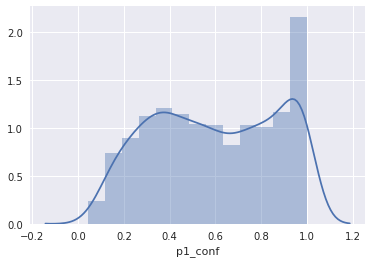

In [71]:
sns.set(style='darkgrid')
ax = sns.distplot(df_image_predictions['p1_conf'])

- An analysis of the prediction success rate of whether or not the first prediction is a breed of dog is shown in this plot.

- The distribution is dominated by amounts between 0.1 and 0.8. It could also indicate that the model isn't accurate.


(-1.1086866580463621,
 1.1197796704326126,
 -1.1183657634231952,
 1.1101005650557796)

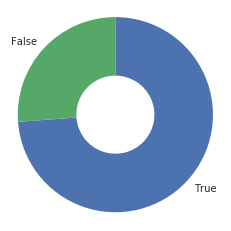

In [72]:
sns.set(style='darkgrid')
sorted_p1 = df_image_predictions['p1_dog'].value_counts()
plt.pie(sorted_p1, labels = sorted_p1.index, startangle = 90, counterclock = False,
       wedgeprops = {'width': 0.6})
plt.axis('square')

- According to the pie chart, almost two thirds of the predictions are correct, although this is not good enough for a deep learning model.

### Visualization

- Most common dog name

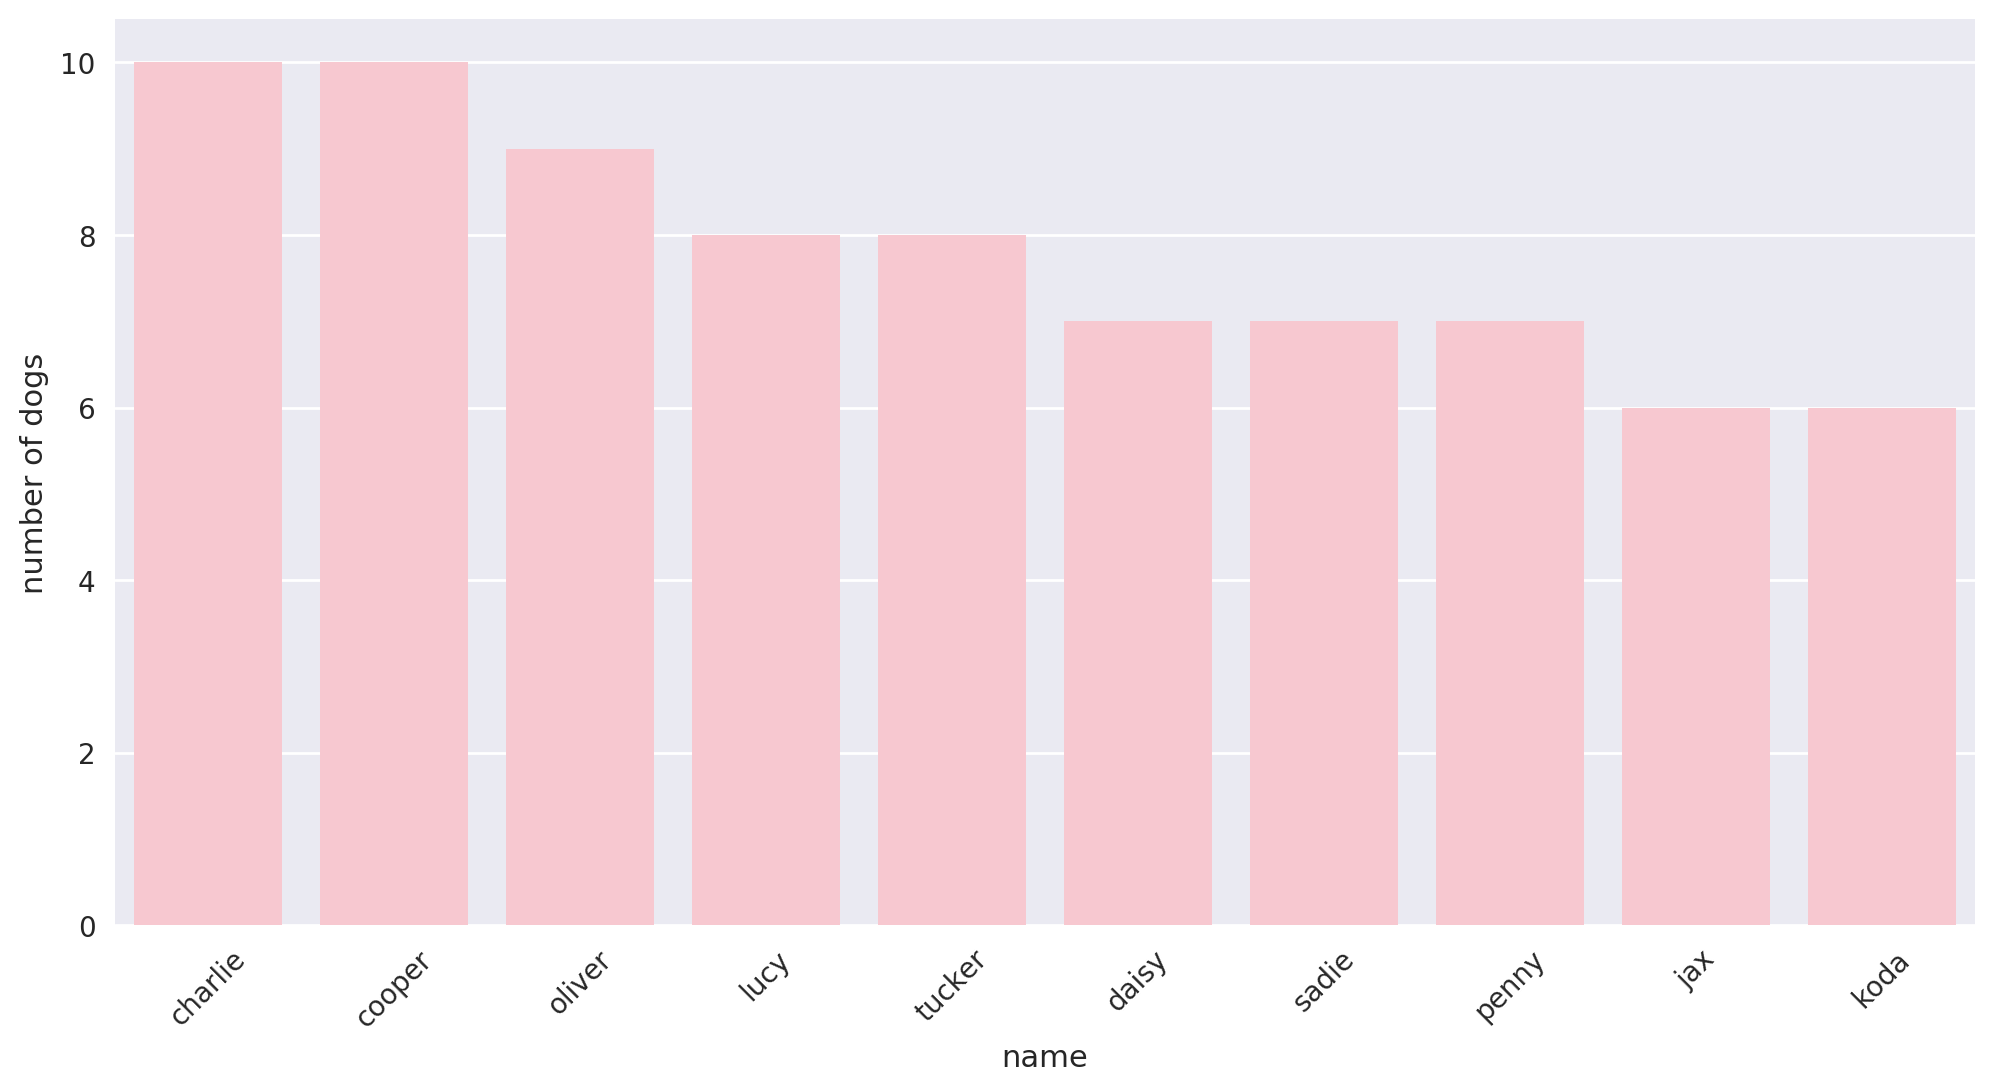

In [73]:
x = copy_of_df['name'].value_counts().to_frame()[:10].reset_index()
x.columns = ['name', 'number of dogs']
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(data= x , x= 'name', y='number of dogs', color = 'pink')
plt.xticks(rotation= 45)
plt.savefig('names.png')

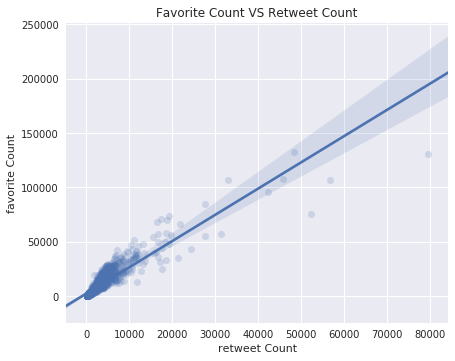

In [76]:
sns.lmplot(x ="retweet_count", y ="favorite_count", data=copy_of_df, size = 5, aspect=1.3, scatter_kws={'alpha':1/5});

plt.title('Favorite Count VS Retweet Count');
plt.xlabel('retweet Count');
plt.ylabel('favorite Count');
plt.savefig('retweetsvsfavorites.png')

- There is a positive correlation between favorite counts and retweet counts.

### Insights:
1. golden retriever is the most popular breed(150) and the second is Labrador retriever(100).  

2. Almost two thirds of the predictions are correct, although this is not good enough for a deep learning model.

3. The most common dog name is Charlie and cooper.

4. there is a positive correlation between favorite counts and retweet counts.